# Coolpuppy CLI walkthrough notebook
Please first see the python API examples for a more detailed introduction.
Here we will reproduce all of the plots from the API notebook, but only using CLI!
Note that, however, the API tutorial saves some files used in the commands here which would be tricky to obtain using CLI tools only.

In [1]:
# We can use this function to display a file within the notebook
from IPython.display import Image

In [2]:
import cooltools
# Downloading test data for pileups
# cache = True will doanload the data only if it was not previously downloaded
# data_dir="./" will force download to the current directory
cool_file = cooltools.download_data("HFF_MicroC", cache=True, data_dir='./')
ctcf_peaks_file = cooltools.download_data("HFF_CTCF_binding", cache=True, data_dir='./')
ctcf_fc_file = cooltools.download_data("HFF_CTCF_fc", cache=True, data_dir='./')

## Simple local pileup
First a simple local pileup around all CTCF sites. This command will save the pileup in a hdf5-based file together with all parameters that were used when running it.

In [3]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --nshifts 0 \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_nonorm.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 1381
INFO:coolpuppy:('chr17_p', 'chr17_p'): 548
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2221
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1602
INFO:coolpuppy:Total number of piled up windows: 5752
INFO:coolpuppy:Saved output to local_CTCF_pileup_nonorm.clpy


This is the plotting command, which in this case simply takes the path to the file we just produced, the output path, and some arguments to control the esthetics of thefigure.

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical
INFO:coolpuppy:Saved output to local_CTCF_pileup_nonorm.png


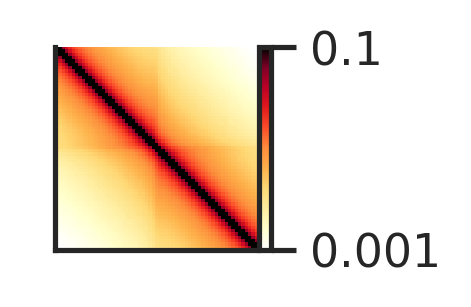

In [4]:
!plotpup.py --cmap fall --vmax 0.1 --vmin 0.001 \
    --no_score \
    --input_pups local_CTCF_pileup_nonorm.clpy \
    --output local_CTCF_pileup_nonorm.png

Image('local_CTCF_pileup_nonorm.png')

## Pileups by strand
Now let's split the pileup in two, based on the strands of CTCF sites. There is a simple "preset" for that, you simply need to add `--by_strand` argument.

In [5]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --nshifts 0 \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --by-strand \
    --outname local_CTCF_pileup_bystrand_nonorm.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 1381
INFO:coolpuppy:('chr17_p', 'chr17_p'): 548
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2221
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1602
INFO:coolpuppy:Total number of piled up windows: 5752
INFO:coolpuppy:Saved output to local_CTCF_pileup_bystrand_nonorm.clpy


INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical
INFO:coolpuppy:Saved output to local_CTCF_pileup_bystrand_nonorm.png


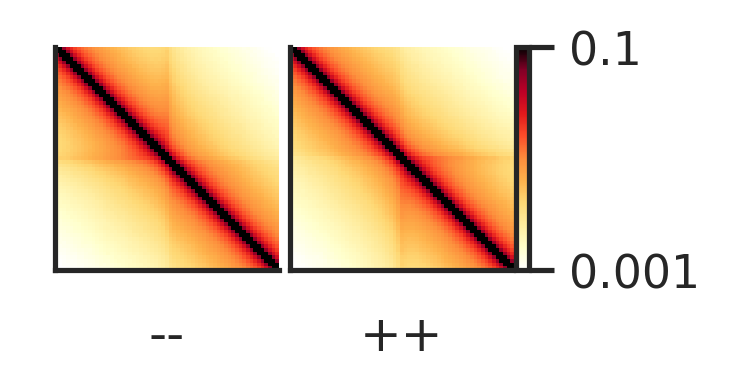

In [6]:
!plotpup.py --cols orientation \
    --col_order "-- ++" \
    --cmap fall --vmax 0.1 --vmin 0.001 \
    --no_score \
    --input_pups local_CTCF_pileup_bystrand_nonorm.clpy \
    --output local_CTCF_pileup_bystrand_nonorm.png

Image('local_CTCF_pileup_bystrand_nonorm.png')

## Normalization to background interaction level
### Random shifts
Now let's repeat the above, but also normalize the pileups to the decay of contact probability with separation. You can either use the randomly shifted control regions (here) or a global expected level of interactions calculated for the whole chromosome arm (see below).

In [7]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --by_strand --nshifts 1 \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_bystrand_1shift.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 1381
INFO:coolpuppy:('chr17_p', 'chr17_p'): 548
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2221
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1602
INFO:coolpuppy:Total number of piled up windows: 5752
INFO:coolpuppy:Saved output to local_CTCF_pileup_bystrand_1shift.clpy


INFO:coolpuppy:Saved output to local_CTCF_pileup_bystrand_1shift.png


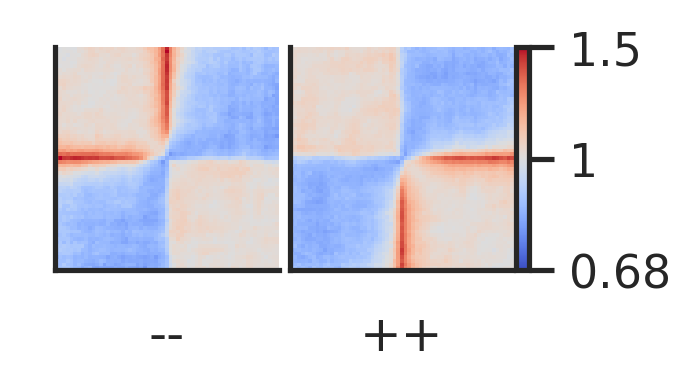

In [8]:
!plotpup.py --cols orientation \
    --col_order "-- ++" \
    --no_score \
    --input_pups local_CTCF_pileup_bystrand_1shift.clpy \
    --output local_CTCF_pileup_bystrand_1shift.png 

Image('local_CTCF_pileup_bystrand_1shift.png')

### Chromosome arm-wide expected normalization
While we computed the expected using cooltools python API in the API notebook, here is the CLI version of the same process, with 2 cores.

In [9]:
!cooltools expected-cis --view hg38_arms.bed -p 2 -o test_expected_cis.tsv test.mcool::resolutions/10000

This is a little faster than using random shifts, and in most cases results are very similar. Therefore when a cooler file is used multiple times, it's beneficial to use this approach.

In [10]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_bystrand_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 1381
INFO:coolpuppy:('chr17_p', 'chr17_p'): 548
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2221
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1602
INFO:coolpuppy:Total number of piled up windows: 5752
INFO:coolpuppy:Saved output to local_CTCF_pileup_bystrand_expected.clpy


INFO:coolpuppy:Saved output to local_CTCF_pileup_bystrand_expected.png


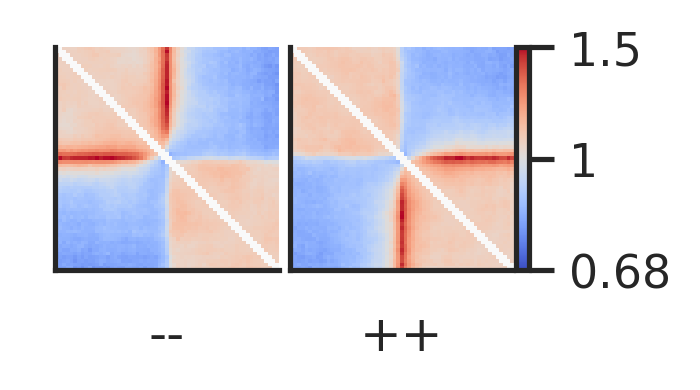

In [11]:
!plotpup.py --cols orientation \
    --col_order "-- ++" \
    --no_score \
    --input_pups local_CTCF_pileup_bystrand_expected.clpy \
    --output local_CTCF_pileup_bystrand_expected.png

Image('local_CTCF_pileup_bystrand_expected.png')

Instead of splitting two strands into two separate pileups, one can also flip the features on the negative strand using `--flip_negative_strand`. This way a single pileup is created where all features face in the same direction (as if they were on the positive strand). We can also add `--plot_ticks` to show the central and flanking coordinates on the bottom of the plot.

In [12]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --features_format bed --local --expected test_expected_cis.tsv \
    --flip_negative_strand --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
    --outname local_CTCF_pileup_flipped_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 1381
INFO:coolpuppy:('chr17_p', 'chr17_p'): 548
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2221
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1602
INFO:coolpuppy:Total number of piled up windows: 5752
INFO:coolpuppy:Saved output to local_CTCF_pileup_flipped_expected.clpy


INFO:coolpuppy:Saved output to local_CTCF_pileup_flipped_expected.png


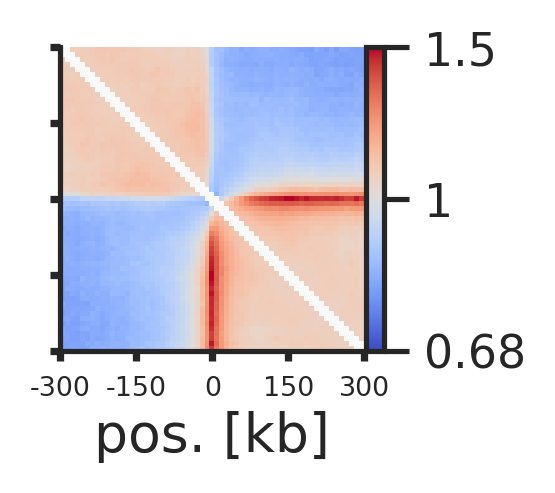

In [13]:
!plotpup.py --plot_ticks --height 1.5 \
    --no_score \
    --input_pups local_CTCF_pileup_flipped_expected.clpy \
    --output local_CTCF_pileup_flipped_expected.png

Image('local_CTCF_pileup_flipped_expected.png')

## Arbitrary grouping of snippets for pileups

Now, let's see if selecting different strength CTCF peaks affects the results. To showcase the power of coolpuppy, we'll demonstrate how it can be used to generate pileups split be arbitrary categories using `groupby`. Note that the input peak file needs to include column names in order to use `groupby`

In [14]:
import pandas as pd
import bioframe
ctcf = bioframe.read_table(ctcf_peaks_file, schema='bed')
ctcf['quartile_score'] = pd.qcut(ctcf['score'], 4, labels=False) + 1
ctcf.to_csv('ctcf_sites.tsv', sep='\t', index=False, header=True)

In [15]:
!coolpup.py test.mcool::resolutions/10000 ctcf_sites.tsv \
        --features_format bed --local --expected test_expected_cis.tsv \
        --ignore_diags 0 --view hg38_arms.bed --flank 300000 \
        --flip_negative_strand --groupby quartile_score1 \
        --outname groupby_score_CTCF_pileup_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 1381
INFO:coolpuppy:('chr17_p', 'chr17_p'): 548
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2221
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1602
INFO:coolpuppy:Total number of piled up windows: 5752
INFO:coolpuppy:Saved output to groupby_score_CTCF_pileup_expected.clpy


INFO:coolpuppy:Saved output to groupby_score_CTCF_pileup_expected.png


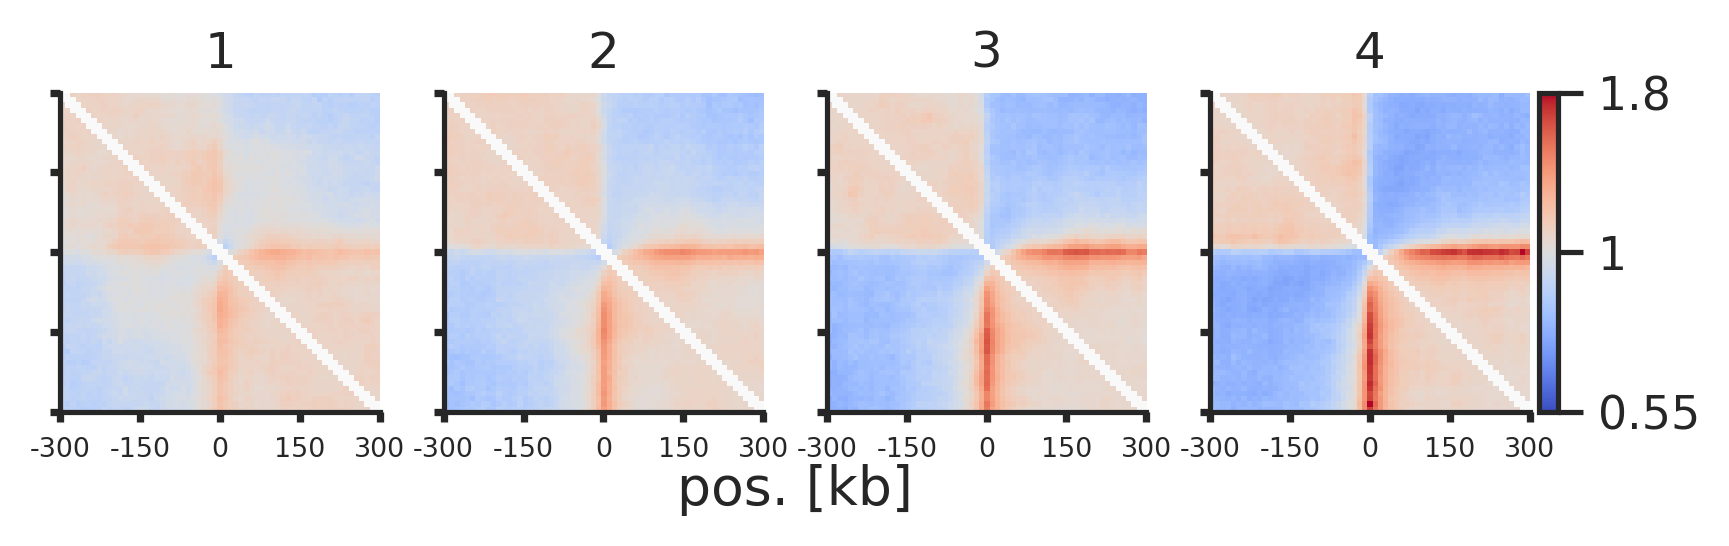

In [16]:
!plotpup.py --plot_ticks --height 1.5 \
    --no_score --cols quartile_score1 \
    --col_order '1 2 3 4' \
    --input_pups groupby_score_CTCF_pileup_expected.clpy \
    --output groupby_score_CTCF_pileup_expected.png

Image('groupby_score_CTCF_pileup_expected.png')

## By-distance pileups
Now we can add another layer of complexity: look at distal interactions betwwen CTCF sites, and split all snippets by their distance.
We use the file that we saved in the python API notebook that contains the annotation of site strength. `coolpup.py` can accept the coordinate input from stdin, so we can filter that file on the fly using awk, and this way we can use only the strong CTCF sites.

In [17]:
# This command will take a bit longer to run, since it's averaging over a much larger number of snippets
!cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores")' | coolpup.py test.mcool::resolutions/10000 - \
    --features_format bed --by_distance --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 --mindist 100000 --maxdist 102400000 \
    --outname bydistance_CTCF_pileup_bystrand_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 10250
INFO:coolpuppy:('chr17_p', 'chr17_p'): 2959
INFO:coolpuppy:('chr2_q', 'chr2_q'): 15938
INFO:coolpuppy:('chr17_q', 'chr17_q'): 28284
INFO:coolpuppy:Total number of piled up windows: 57431
INFO:coolpuppy:Saved output to bydistance_CTCF_pileup_bystrand_expected.clpy


INFO:coolpuppy:Saved output to bydistance_CTCF_pileup_bystrand_expected.png


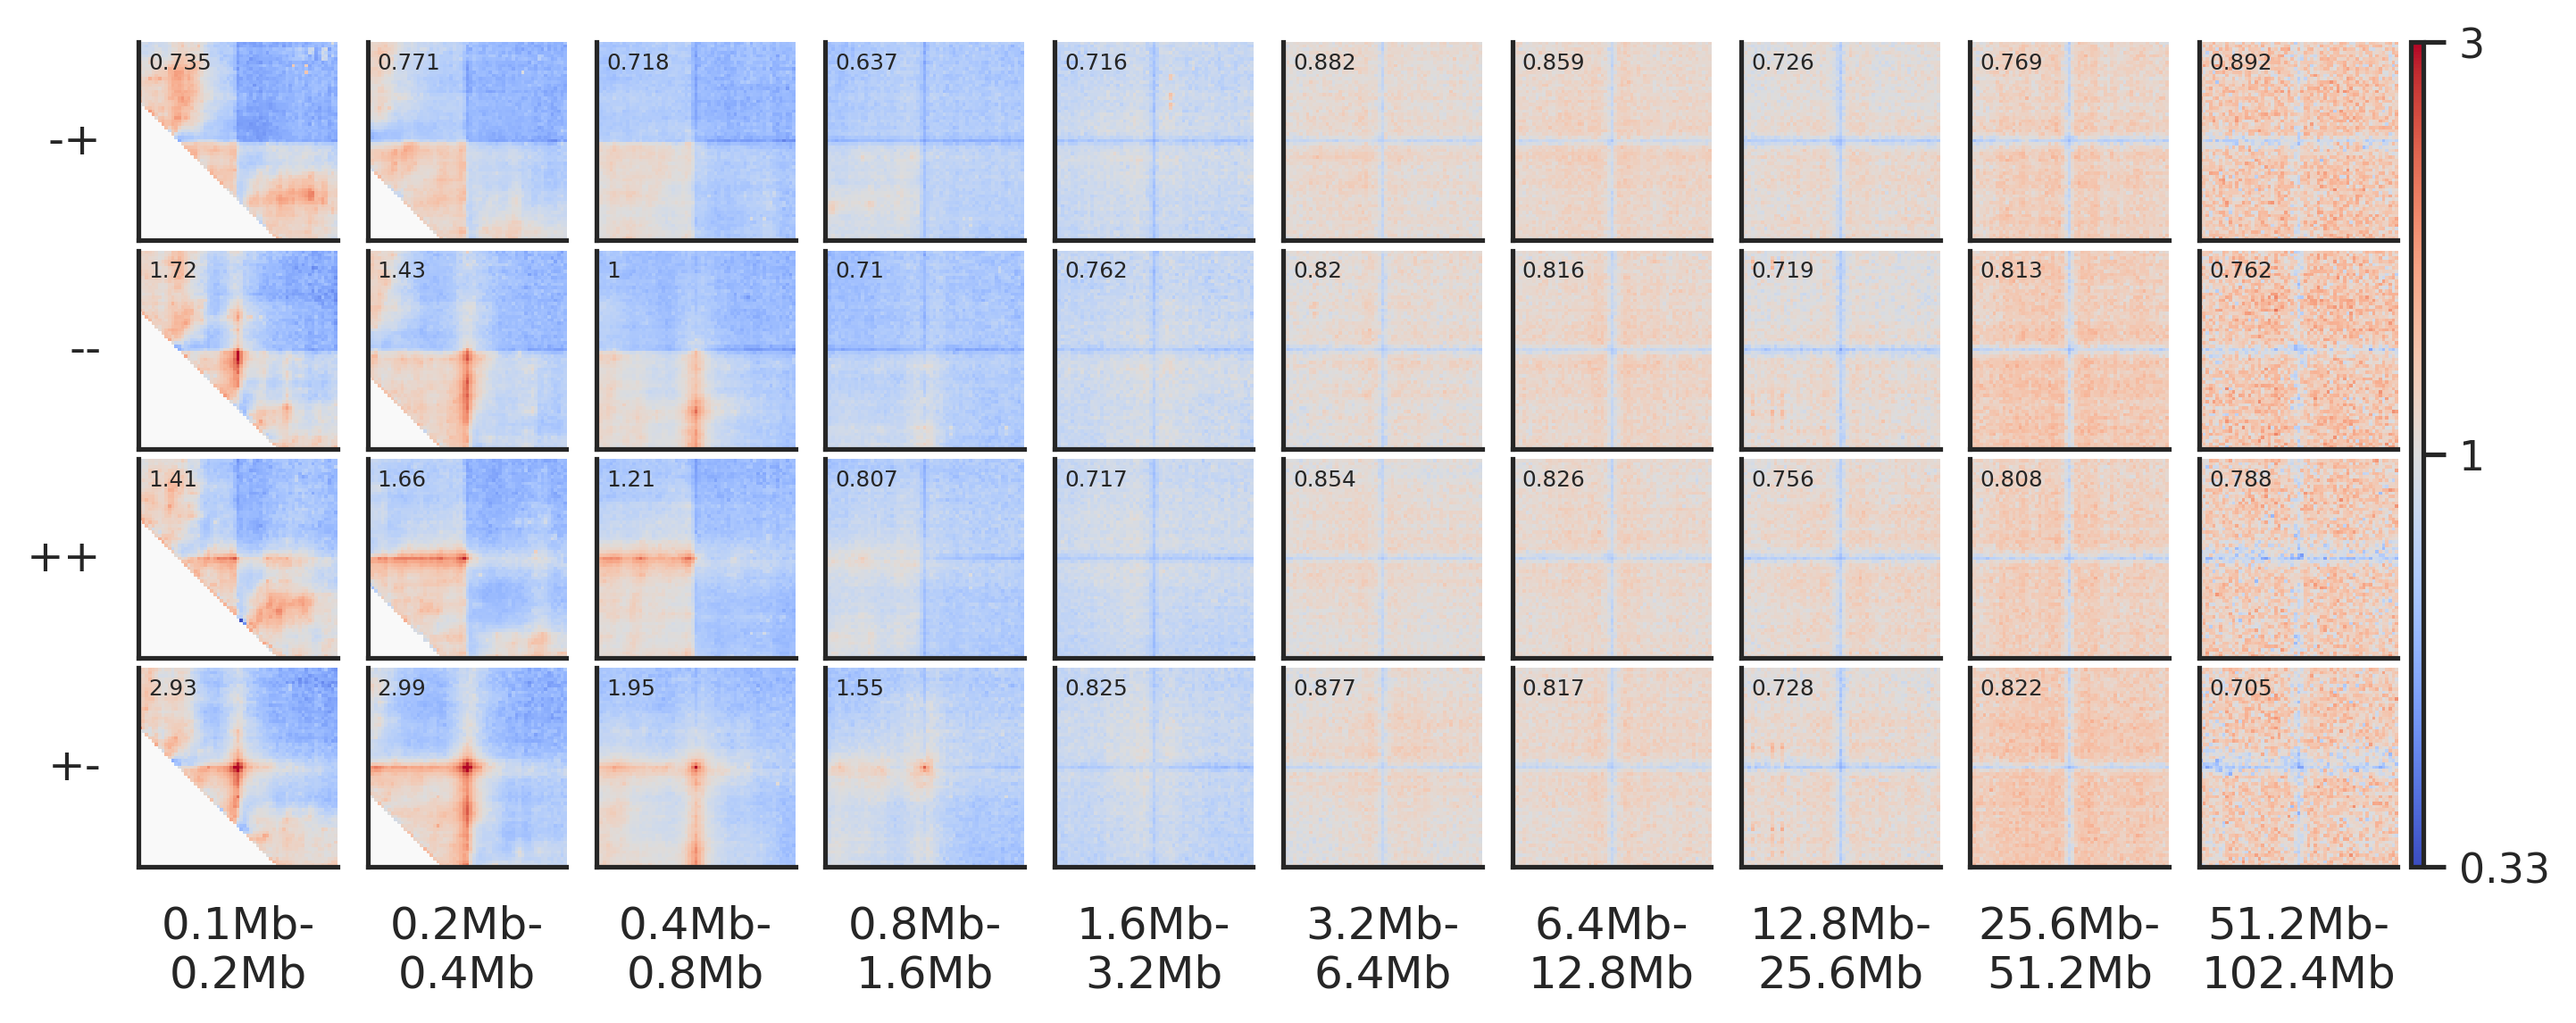

In [18]:
# "separation" is created when the pileups are created by distance, and plotpup.py
# always plots them in the order of increasing distance
# We need to specify the order of rows, otherise it's not guaranteed
!plotpup.py --cols separation \
    --rows orientation \
    --row_order "-+ -- ++ +-" \
    --vmax 3 \
    --input_pups bydistance_CTCF_pileup_bystrand_expected.clpy \
    --output bydistance_CTCF_pileup_bystrand_expected.png

Image('bydistance_CTCF_pileup_bystrand_expected.png')

Now we can also normalize each pileup to the average value in its top-left and bottom-right corners to remove the variation in background level of interactions

INFO:coolpuppy:Saved output to bydistance_CTCF_pileup_bystrand_expected_corner_norm.png


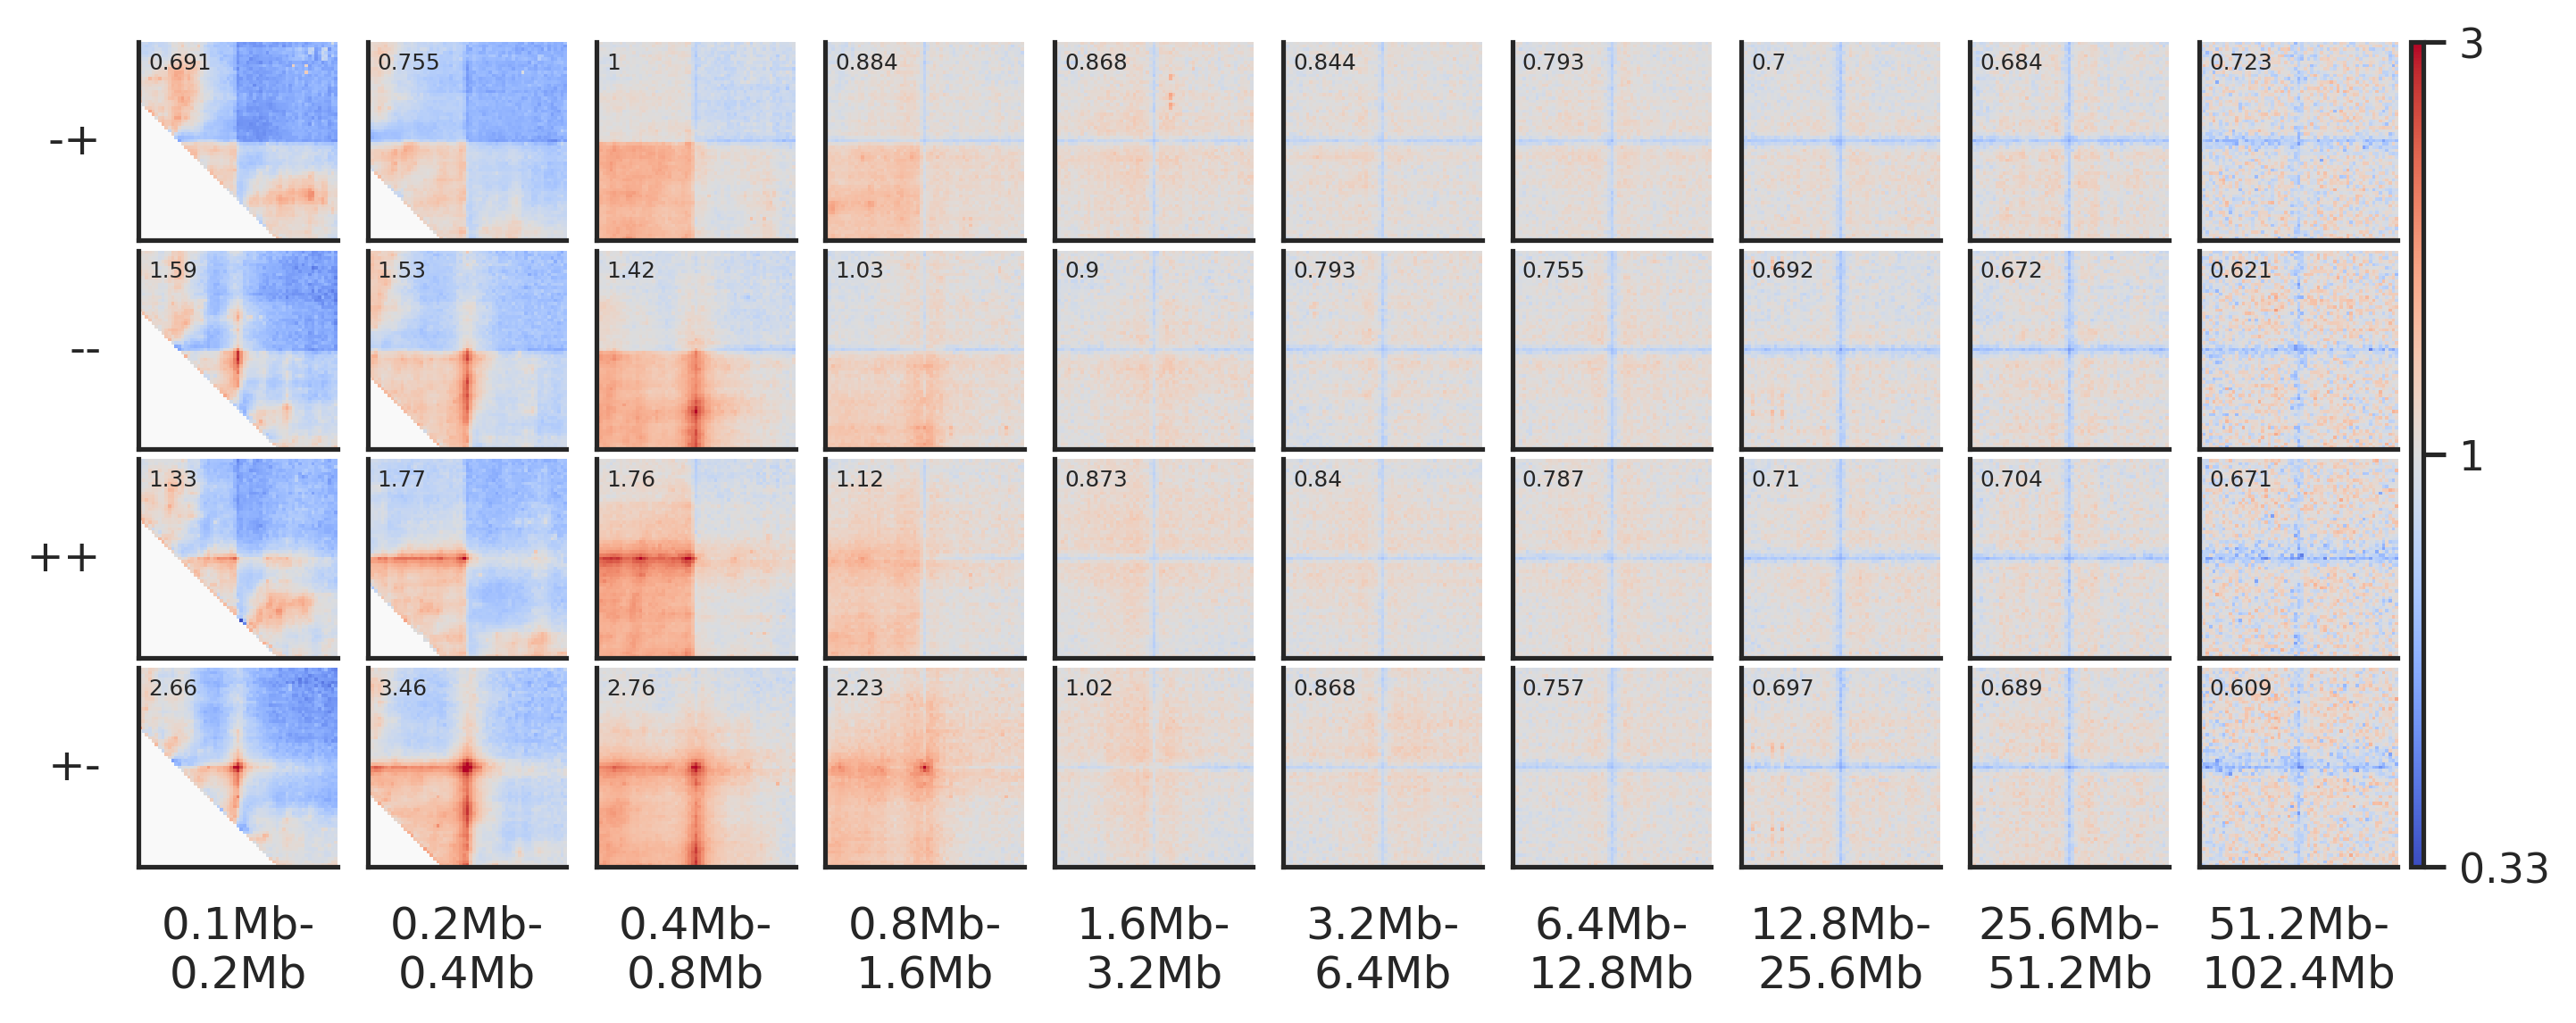

In [19]:
!plotpup.py  --cols separation \
    --rows orientation \
    --row_order "-+ -- ++ +-"\
    --vmax 3 --norm_corners 10 \
    --input_pups bydistance_CTCF_pileup_bystrand_expected.clpy \
    --output bydistance_CTCF_pileup_bystrand_expected_corner_norm.png

Image('bydistance_CTCF_pileup_bystrand_expected_corner_norm.png')

## Dividing pileups

Sometimes you may want to compare two pileups directly and plot the result of the division between them. For this we can use the `dividepups.py` command. Let's look at all CTCF interactions between 100 kb and 1 Mb by motif orientation.

In [20]:
!cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores")' | coolpup.py test.mcool::resolutions/10000 - \
    --features_format bed --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 --mindist 100000 --maxdist 1000000 \
    --outname CTCF_pileup_bystrand_expected.clpy --nproc 2 

INFO:coolpuppy:('chr2_p', 'chr2_p'): 287
INFO:coolpuppy:('chr2_q', 'chr2_q'): 522
INFO:coolpuppy:('chr17_p', 'chr17_p'): 262
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1235
INFO:coolpuppy:Total number of piled up windows: 2306
INFO:coolpuppy:Saved output to CTCF_pileup_bystrand_expected.clpy


INFO:coolpuppy:Saved output to CTCF_pileup_bystrand_expected.png


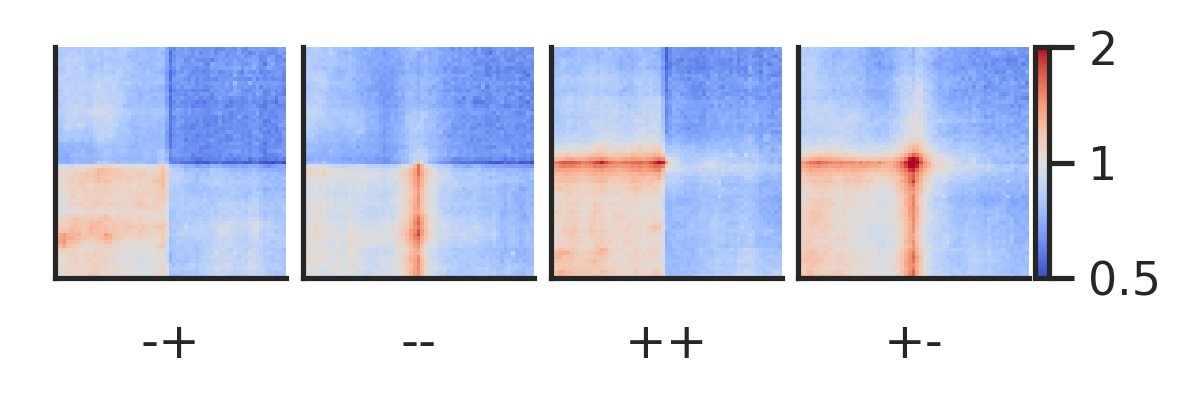

In [21]:
!plotpup.py --cols orientation \
    --col_order "-+ -- ++ +-" \
    --vmax 2 \
    --no_score \
    --input_pups CTCF_pileup_bystrand_expected.clpy \
    --output CTCF_pileup_bystrand_expected.png
    

Image('CTCF_pileup_bystrand_expected.png')

Let's compare the ++ to the -- CTCF motif orientation pileups. First, we have to generate two new pileups for each of the orientations. Importantly, the two pileups cannot differ with regards to the columns they contain and the resolution, flank size etc. they've been generated using.

In [22]:
!cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores") && ($6 == "+")' | coolpup.py test.mcool::resolutions/10000 - \
    --features_format bed --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 --mindist 100000 --maxdist 1000000 \
    --outname CTCF_pileup_plusstrand_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 78
INFO:coolpuppy:('chr2_q', 'chr2_q'): 122
INFO:coolpuppy:('chr17_p', 'chr17_p'): 67
INFO:coolpuppy:('chr17_q', 'chr17_q'): 293
INFO:coolpuppy:Total number of piled up windows: 560
INFO:coolpuppy:Saved output to CTCF_pileup_plusstrand_expected.clpy


In [23]:
!cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores") && ($6 == "-")' | coolpup.py test.mcool::resolutions/10000 - \
    --features_format bed --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 --mindist 100000 --maxdist 1000000 \
    --outname CTCF_pileup_minusstrand_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 62
INFO:coolpuppy:('chr2_q', 'chr2_q'): 118
INFO:coolpuppy:('chr17_p', 'chr17_p'): 53
INFO:coolpuppy:('chr17_q', 'chr17_q'): 324
INFO:coolpuppy:Total number of piled up windows: 557
INFO:coolpuppy:Saved output to CTCF_pileup_minusstrand_expected.clpy


Now we will generate a new pileup of the ratio between the two

In [24]:
!dividepups.py CTCF_pileup_plusstrand_expected.clpy CTCF_pileup_minusstrand_expected.clpy \
    --outname CTCF_pileup_plus_over_minus.clpy

INFO:root:Namespace(input_pups=['CTCF_pileup_plusstrand_expected.clpy', 'CTCF_pileup_minusstrand_expected.clpy'], outname='CTCF_pileup_plus_over_minus.clpy')
INFO:root:Saved output to CTCF_pileup_plus_over_minus.clpy


INFO:coolpuppy:Saved output to CTCF_pileup_plus_over_minus.png


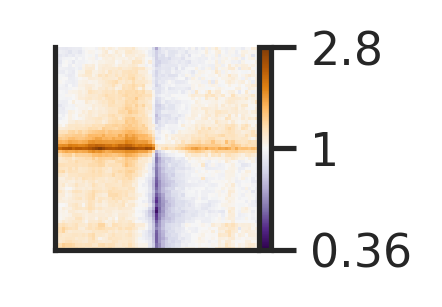

In [25]:
!plotpup.py --no_score --cmap PuOr_r \
    --input_pups CTCF_pileup_plus_over_minus.clpy \
    --output CTCF_pileup_plus_over_minus.png

Image('CTCF_pileup_plus_over_minus.png')

If you want to quickly plot the division of two pileups without saving the intermediate, this can also be done directly in `plotpup.py` with the argument `--divide_pups`

## Stripe stackups

Oftentimes, as seen in the examples above, the interactions between regions are not just focal, but seen as stripes with enrichment along the vertical/horizontal axis from one or both of the anchor points. In the CTCF pileups from above we see a very strong corner stripe between +- sites, so let's try to plot these individual stripes. Below is a schematic of what is meant by the different types of stripes.

In [26]:
!cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores")' | coolpup.py test.mcool::resolutions/10000 - \
    --features_format bed --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --flank 300000 --mindist 100000 --maxdist 1000000 \
    --outname bystrand_CTCF_pileup_bystrand_expected_stripes.clpy --nproc 2 --store_stripes

INFO:coolpuppy:('chr2_p', 'chr2_p'): 287
INFO:coolpuppy:('chr2_q', 'chr2_q'): 522
INFO:coolpuppy:('chr17_p', 'chr17_p'): 262
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1235
INFO:coolpuppy:Total number of piled up windows: 2306
INFO:coolpuppy:Saved output to bystrand_CTCF_pileup_bystrand_expected_stripes.clpy


In the pileups we see a very strong corner stripe between +- sites, so let's try to plot these individual stripes using the `--stripe` argument. Below is a schematic of what is meant by the different types of stripes.

![Stripes](./stripes.png)

INFO:coolpuppy:Saved output to bystrand_CTCF_pileup_+-_expected_cornerstripe.png


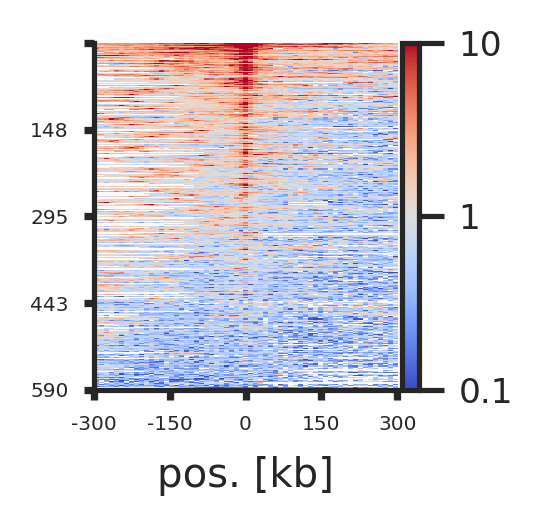

In [27]:
!plotpup.py --rows orientation  \
    --row_order "+-" --stripe corner_stripe \
    --vmax 10 --height 1.5 --font_scale 0.75 --plot_ticks \
    --input_pups bystrand_CTCF_pileup_bystrand_expected_stripes.clpy \
    --output bystrand_CTCF_pileup_+-_expected_cornerstripe.png

Image('bystrand_CTCF_pileup_+-_expected_cornerstripe.png')

Each line of the above plot represents the "corner stripe" between two regions. These pairs are sorted by the sum of the stripe by default, but we can also sort them by the central pixel, i.e. the pixel where the two regions of interest interact, with the `--stripe_sort` argument. We can further save the pairs in the sorted order using `--out_sorted_bedpe`. This file can then be used to inspect individual pairs with high contact frequencies. We can also add a lineplot with the average signal above the stripes using `--lineplot` (note that this only works for single stripe plots.)

INFO:coolpuppy:Saved output to bystrand_CTCF_pileup_+-_expected_cornerstripe_centersort.png


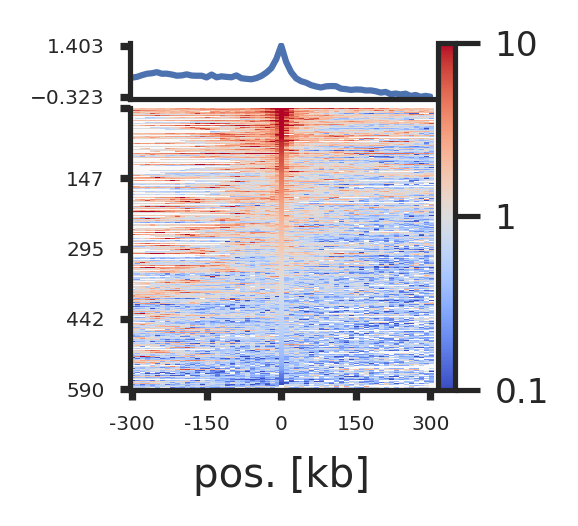

In [28]:
!plotpup.py --rows orientation  \
    --row_order "+-" --stripe corner_stripe \
    --vmax 10 --height 1.5 --font_scale 0.75 --plot_ticks \
    --input_pups bystrand_CTCF_pileup_bystrand_expected_stripes.clpy \
    --output bystrand_CTCF_pileup_+-_expected_cornerstripe_centersort.png \
    --stripe_sort center_pixel --out_sorted_bedpe CTCF_+-_sorted_centerpixel.bedpe \
    --lineplot

Image('bystrand_CTCF_pileup_+-_expected_cornerstripe_centersort.png')

## Rescaling

Pileups can also be rescaled to visualise enrichment within regions of interests of different sizes using `--rescale`. The `--rescale_flank` value represents how large the flanks are compared to the region of interest, where 1 is equal in size and for example 3 will be a three times the size. The number of pixels in the final plot after rescaling is set with `--rescale_size`. Let's try this for B compartment interactions.

In [29]:
!coolpup.py test.mcool::resolutions/10000 B_compartments.bed \
    --features_format bed --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed \
    --rescale --rescale_flank 1 --rescale_size 99 \
    --outname B_compartment_pileup_rescaled_expected.clpy --nproc 2

INFO:coolpuppy:Rescaling with rescale_flank = 1.0 to 99x99 pixels
INFO:coolpuppy:('chr2_p', 'chr2_p'): 36
INFO:coolpuppy:('chr17_p', 'chr17_p'): 6
INFO:coolpuppy:('chr17_q', 'chr17_q'): 21
INFO:coolpuppy:('chr2_q', 'chr2_q'): 153
INFO:coolpuppy:Total number of piled up windows: 216
INFO:coolpuppy:Saved output to B_compartment_pileup_rescaled_expected.clpy


INFO:coolpuppy:Saved output to B_compartment_pileup_rescaled_expected.png


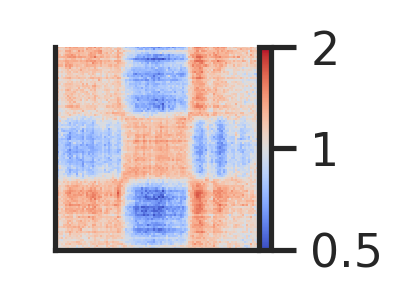

In [30]:
!plotpup.py --vmax 2 --no_score \
    --input_pups B_compartment_pileup_rescaled_expected.clpy \
    --output B_compartment_pileup_rescaled_expected.png

Image('B_compartment_pileup_rescaled_expected.png')

## Trans (inter-chromosomal) pileups

We can also perform pileups between regions on different chromosomes. We will try this for insulation score boundaries (TAD boundaries), first for cis (within chromosomes) and then for trans (between chromosomes). 

In [31]:
!coolpup.py test.mcool::resolutions/10000 strong_boundaries.bed \
    --features_format bed --expected test_expected_cis.tsv \
    --view hg38_arms.bed --flank 300000 \
    --outname strong_boundaries_pileup_cis_expected.clpy --nproc 2

INFO:coolpuppy:('chr2_p', 'chr2_p'): 807
INFO:coolpuppy:('chr17_p', 'chr17_p'): 99
INFO:coolpuppy:('chr2_q', 'chr2_q'): 2262
INFO:coolpuppy:('chr17_q', 'chr17_q'): 1354
INFO:coolpuppy:Total number of piled up windows: 4522
INFO:coolpuppy:Saved output to strong_boundaries_pileup_cis_expected.clpy


INFO:coolpuppy:Saved output to strong_boundaries_pileup_cis_expected.png


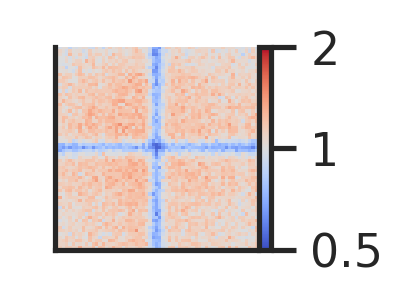

In [32]:
!plotpup.py --vmax 2 --no_score \
    --input_pups strong_boundaries_pileup_cis_expected.clpy \
    --output strong_boundaries_pileup_cis_expected.png

Image('strong_boundaries_pileup_cis_expected.png')

Here we can see the boundary pileups within chromosome arms where interactions are depleted at the boundaries. To perform the same analysis between chromosomes, we need to use an expected file generated for trans (or use shifted controls) and then run the analysis with `--trans`.

In [33]:
!cooltools expected-trans -p 2 -o test_expected_trans.tsv test.mcool::resolutions/10000

In [34]:
!coolpup.py test.mcool::resolutions/10000 strong_boundaries.bed \
    --features_format bed --expected test_expected_trans.tsv \
    --flank 300000 --trans \
    --outname strong_boundaries_pileup_trans_expected.clpy --nproc 2

/gpfs/igmmfs01/eddie/wendy-lab/elias/coolpuppy_trans/coolpuppy/coolpuppy/coolpup.py:2115: UserWarning: Ignoring maxdist when using trans
  CC = CoordCreator(
INFO:coolpuppy:('chr2', 'chr17'): 7412
INFO:coolpuppy:Total number of piled up windows: 7412
INFO:coolpuppy:Saved output to strong_boundaries_pileup_trans_expected.clpy


INFO:coolpuppy:Saved output to strong_boundaries_pileup_trans_expected.png


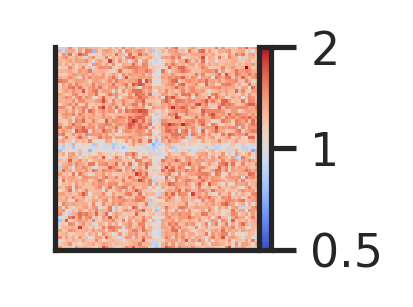

In [35]:
!plotpup.py --vmax 2 --no_score \
    --input_pups strong_boundaries_pileup_trans_expected.clpy \
    --output strong_boundaries_pileup_trans_expected.png

Image('strong_boundaries_pileup_trans_expected.png')

Here we can see that boundaries are depleted in interactions also between chromosomes.